In [150]:
# General imports that you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [151]:
#Read the properties file
properties = pd.read_csv('../data/properties.csv', header=0, index_col=0)
properties.head(5)

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [152]:
# Check columns
properties.columns

Index(['Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [153]:
# Check data types
properties.dtypes

Address       object
AreaName      object
Price ($)      int64
lat          float64
lng          float64
dtype: object

In [154]:
# Check numm values
properties.isnull().sum()

Address        0
AreaName     483
Price ($)      0
lat            0
lng            0
dtype: int64

In [155]:
#Total data points
properties.shape[0]

25351

In [156]:
#Descriptive statistics
properties.describe()

,Price ($),lat,lng
count,2.535100e+04,25351.000000,25351.000000
mean,5.645438e+05,37.326614,-85.218379
std,8.475962e+05,82.858347,73.093572
min,0.000000e+00,-999.000000,-999.000000
25%,2.199000e+05,43.401087,-80.308159
50%,3.719000e+05,43.715977,-79.503342
75%,6.199000e+05,44.466711,-79.107326
max,3.250000e+07,53.851017,1.074519


In [210]:
properties['Qs']=pd.qcut(properties['Price ($)'], 3, labels=False)
properties.head()

,Address,AreaName,Price ($),lat,lng,Qs
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,2
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,1
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,1
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,1
6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,1


In [211]:
new_properties = properties[properties['lat'].between(properties['lat'].quantile(0.15), properties['lat'].quantile(.85))]
new_properties

,Address,AreaName,Price ($),lat,lng,Qs
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,2
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,1
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,1
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,1
6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,1
...,...,...,...,...,...,...
124917,"403 ANDERSON DRIVE Cornwall, ON",Cornwall,204900,45.031879,-74.692535,0
124918,"LOT 7 Pauline Tom Ave Kingston, ON",Kingston,799900,44.275501,-76.444443,2
124919,"4182 THOMAS ALTON Boulevard Burlington, ON",Burlington,699900,43.397976,-79.823456,2
124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249,2


In [173]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [174]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [212]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [219]:
street_map = gpd.read_file('../data/FME_b03600530688942/obm_OBMUSER_Municipal_upper_tier_poly.shp')

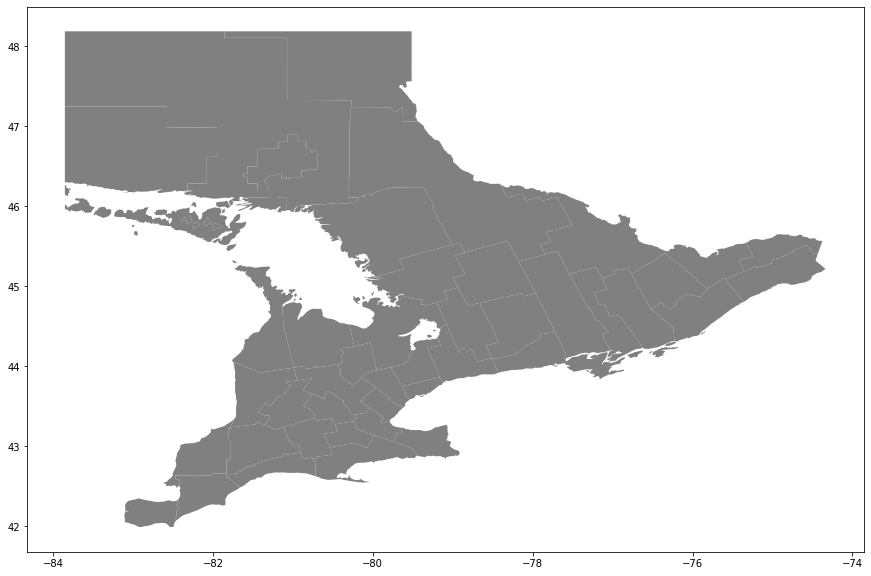

In [220]:
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, color='grey')

In [221]:
geometry = [Point(xy) for xy in zip(new_properties['lng'], new_properties['lat'])]
geometry[:3]

In [222]:
crs = {'init': 'epsg:4326'}

In [223]:
geo_properties = gpd.GeoDataFrame(new_properties, crs=crs, geometry = geometry)
geo_properties.head()

,Address,AreaName,Price ($),lat,lng,Qs,geometry
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,2,POINT (-79.54427 43.67988)
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,1,POINT (-79.90440 43.25000)
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,1,POINT (-79.91936 43.25169)
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,1,POINT (-79.76740 43.22716)
6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,1,POINT (-79.36812 43.65148)


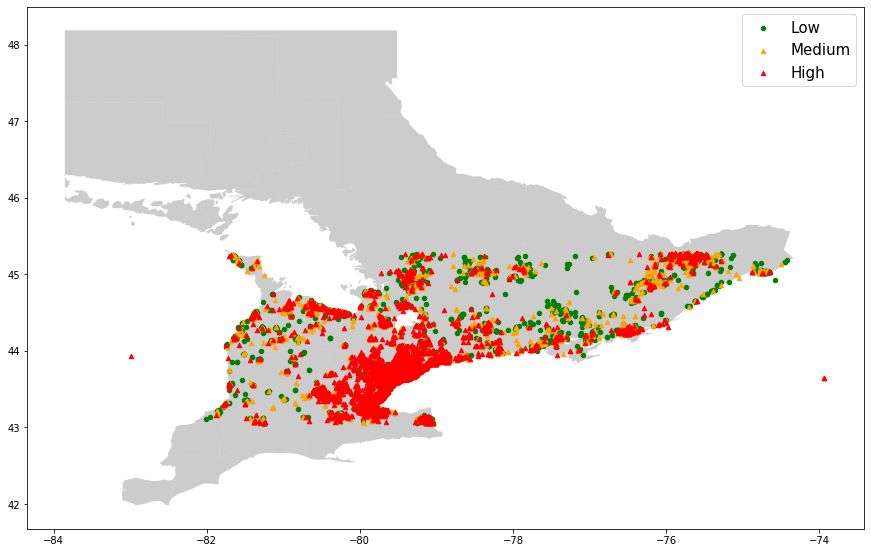

In [224]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha = 0.4, color='grey')
geo_properties[geo_properties['Qs']==0].plot(ax=ax, markersize=20, color='green', marker='o', label='Low')
geo_properties[geo_properties['Qs']==1].plot(ax=ax, markersize=20, color='orange', marker='^', label='Medium')
geo_properties[geo_properties['Qs']==2].plot(ax=ax, markersize=20, color='red', marker='^', label='High')
plt.legend(prop={'size':15})

### Red are high prices, yellow as medium prices, and green as low prices. We can see that majority of the high prices are located in the downtown core.